In [ ]:
# Install required libraries
!pip install pycryptodome opencv-python numpy

# Imports
import cv2
import numpy as np
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad, unpad
from Crypto.Random import get_random_bytes
from google.colab import files
import matplotlib.pyplot as plt
import base64

In [ ]:
def encrypt_message_aes(message, key):
    cipher = AES.new(key, AES.MODE_CBC)
    ct_bytes = cipher.encrypt(pad(message.encode(), AES.block_size))
    return cipher.iv + ct_bytes  # prepend IV

def decrypt_message_aes(ciphertext, key):
    try:
        iv = ciphertext[:AES.block_size]
        ct = ciphertext[AES.block_size:]
        cipher = AES.new(key, AES.MODE_CBC, iv)
        pt = unpad(cipher.decrypt(ct), AES.block_size)
        return pt.decode()
    except (ValueError, UnicodeDecodeError) as e:
        print("Decryption failed:", e)
        return None

In [ ]:
#  Binary helpers
def to_binary(data_bytes):
    return ''.join(format(byte, '08b') for byte in data_bytes)

def from_binary(binary_str):
    byte_list = [int(binary_str[i:i+8], 2) for i in range(0, len(binary_str), 8)]
    return bytes(byte_list)

In [ ]:
#  LSB Steganography in RGB
def embed_lsb(image_path, binary_data):
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"Image not found: {image_path}")
    flat = img.flatten()
    if len(binary_data) > len(flat):
        raise ValueError("Image too small for the message.")
    for i in range(len(binary_data)):
        flat[i] = (flat[i] & 254) | int(binary_data[i])
    return flat.reshape(img.shape)

def extract_lsb(stego_img, bit_len):
    flat = stego_img.flatten()
    bits = [str(flat[i] & 1) for i in range(bit_len)]
    return ''.join(bits)

In [ ]:

for uploaded_file in files.upload():
    img_name = uploaded_file


Saving img.jpg to img (1).jpg


In [ ]:

#  Message to Hide
message = "This is a secret message from Nafees!"
key = get_random_bytes(16)  # AES-128 key

In [ ]:
#  Encrypt & Convert to binary
ciphertext = encrypt_message_aes(message, key)
binary_cipher = to_binary(ciphertext)

#  Embed in image
stego_img = embed_lsb(img_name, binary_cipher)
cv2.imwrite("stego_output.png", stego_img)

True

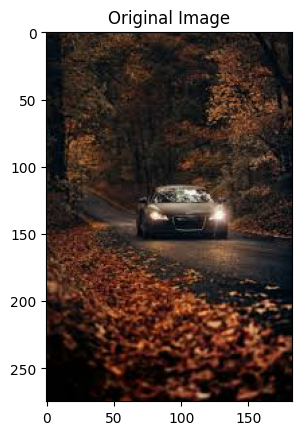

In [ ]:
# Load and convert the original image to RGB
# This needs to happen before you try to display 'original'
original = cv2.cvtColor(cv2.imread(img_name), cv2.COLOR_BGR2RGB)

plt.title("Original Image")
plt.imshow(original)

🔐 AES Key (base64): k3XHfJ+ZP8uOkapDOcrWVA==
📩 Original Message: This is a secret message from Nafees!
📤 Recovered Message: This is a secret message from Nafees!


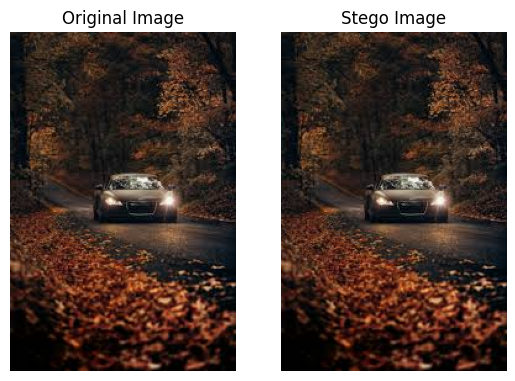

In [ ]:
#  Extract and Decrypt
# Pass the stego image array directly to extract_lsb, not the path
# Use stego_img instead of stego
recovered_bits = extract_lsb(stego_img, len(binary_cipher))
recovered_bytes = from_binary(recovered_bits)
recovered_message = decrypt_message_aes(recovered_bytes, key)

# Display Results
print("🔐 AES Key (base64):", base64.b64encode(key).decode())
print("📩 Original Message:", message)
print("📤 Recovered Message:", recovered_message)

# Display Original vs Stego Image
original = cv2.cvtColor(cv2.imread(img_name), cv2.COLOR_BGR2RGB)
# Use stego_img instead of stego for display as well
stego_display = cv2.cvtColor(stego_img, cv2.COLOR_BGR2RGB)

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(original)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title("Stego Image")
plt.imshow(stego_display)
plt.axis('off')
plt.show()

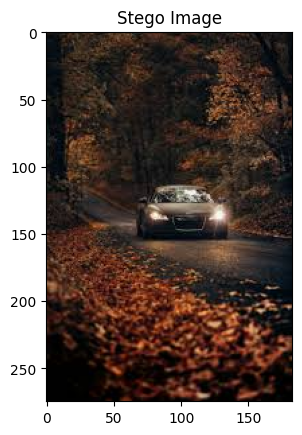

In [ ]:
plt.title("Stego Image")
plt.imshow(stego_display)